### Offshore converter (Energyhub) capacities

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

#CASES = ["base", "cap25", "cap50", "floatingCap50", "cables50", "opex50", "base_noHydro", "cap50_noHydro"]
#CASES = ["base", "cap10", "cap20", "cap50", "cables_base", "cables_cap10", "cables_cap20", "cables_cap50"]
CASES = ["base", "cables20", "cablesHub20", "cap20", "cap50", "radial", "radial_NO"]
DF_BY_CASES = dict({})

for case in CASES:
    #_df = pd.read_csv(f'offshore_converter/new_{case}_results_output_offshoreConverter.csv')
    _df = pd.read_csv(f'new_longer_dist_{case}/results_output_offshoreConverter.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':                 Node     Period  Converter invested capacity [MW]  \
 0        EnergyhubEU  2020-2025                          0.033393   
 1        EnergyhubEU  2025-2030                          0.000001   
 2        EnergyhubEU  2030-2035                      11937.881452   
 3        EnergyhubEU  2035-2040                       2432.959528   
 4        EnergyhubEU  2040-2045                      14616.081399   
 5        EnergyhubEU  2045-2050                          0.022374   
 6        EnergyhubEU  2050-2055                          0.000005   
 7        EnergyhubEU  2055-2060                          0.000002   
 8     EnergyhubNorth  2020-2025                          0.031658   
 9     EnergyhubNorth  2025-2030                          0.000002   
 10    EnergyhubNorth  2030-2035                          0.126422   
 11    EnergyhubNorth  2035-2040                          0.000087   
 12    EnergyhubNorth  2040-2045                      13189.891319   
 13    Energ

In [66]:
def plot_offshore_converter_cap(case, _df):
    df = _df[["Node", "Period", "Converter total capacity [MW]"]]

    prod_converter_2050 = df[df["Period"] == "2045-2050"]["Converter total capacity [MW]"].sum()
    print(f"Offshore converter total capacity 2050 for case {case}: {round(prod_converter_2050/1000, 2)} GW\n")

    # Skip plots that have no capacity (1 MW since some threshold)
    if prod_converter_2050 < 1: 
        return

    periods = list(df["Period"].unique())
    nodes_sorted_by_cap = list(df[df["Period"] == "2055-2060"]\
                              .sort_values(by="Converter total capacity [MW]", ascending=False)["Node"].values)

    nodes_displayed = nodes_sorted_by_cap
    
    installed_caps = []
    for node in nodes_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df[(df["Node"] == node) & (df["Period"] == period)]["Converter total capacity [MW]"].values[0])

        # Remove nodes that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            nodes_displayed.remove(node)
            continue
        else:
            installed_caps.append(cap_by_period)
    
    installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
    period_displayed = [period.split("-")[1] for period in periods]

    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(10,8))
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.stackplot(period_displayed, installed_caps_GW, labels=nodes_displayed)
    plt.ylabel('Offshore converter capacity [GW]')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)
    plt.title(f"Offshore converter capacity for case: {case}")
    plt.show()

Offshore converter total capacity 2050 for case base: 75.81 GW



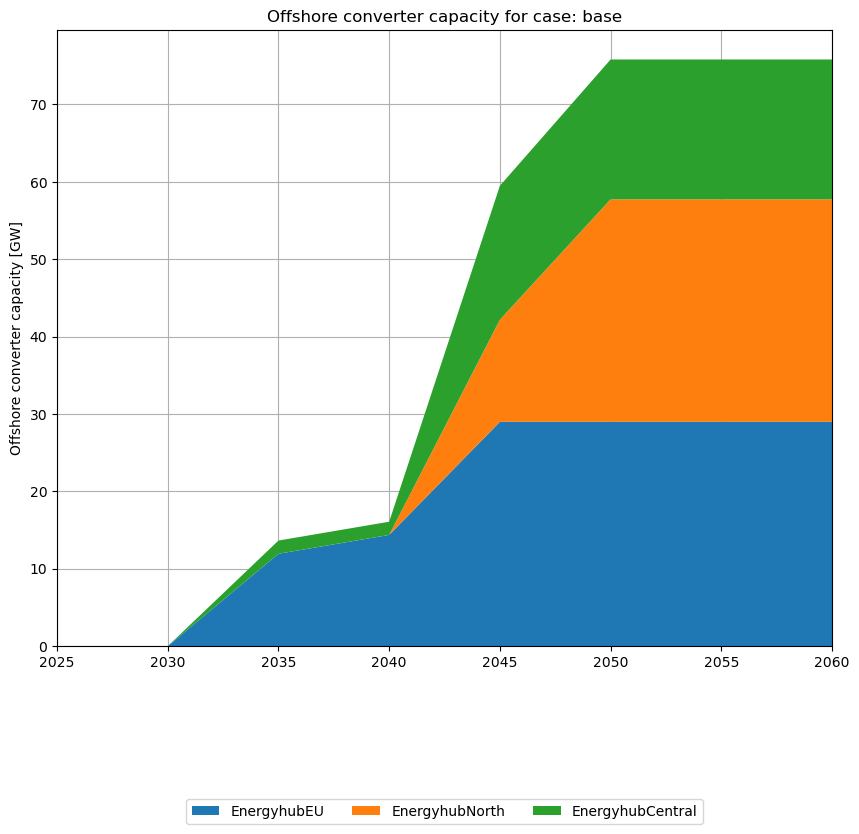

Offshore converter total capacity 2050 for case cables20: 99.38 GW



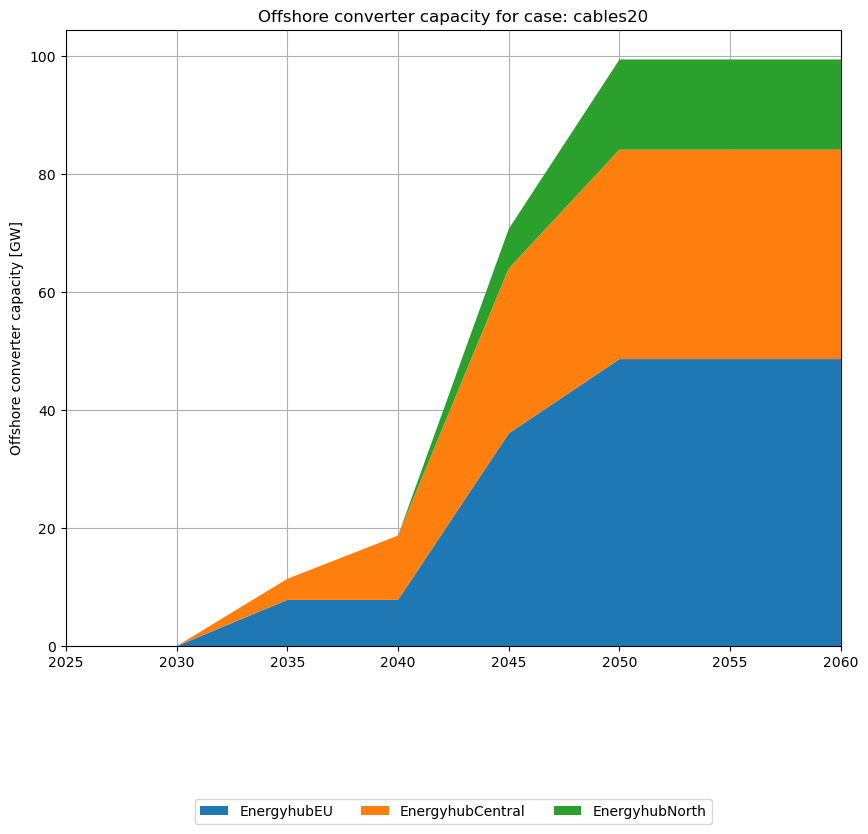

Offshore converter total capacity 2050 for case cablesHub20: 63.2 GW



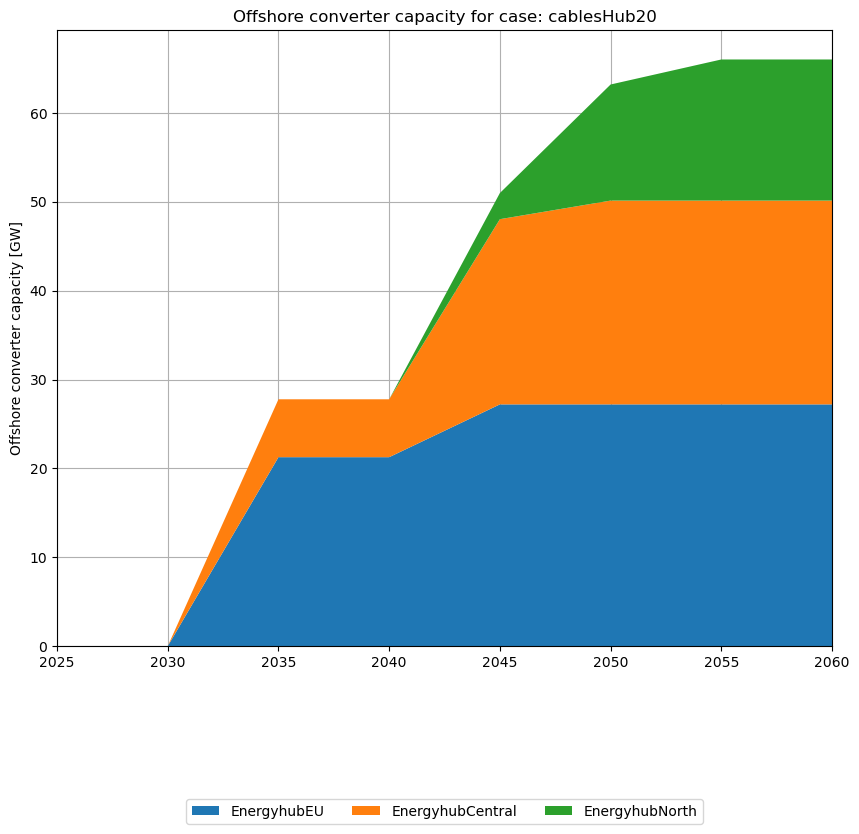

Offshore converter total capacity 2050 for case cap20: 108.53 GW



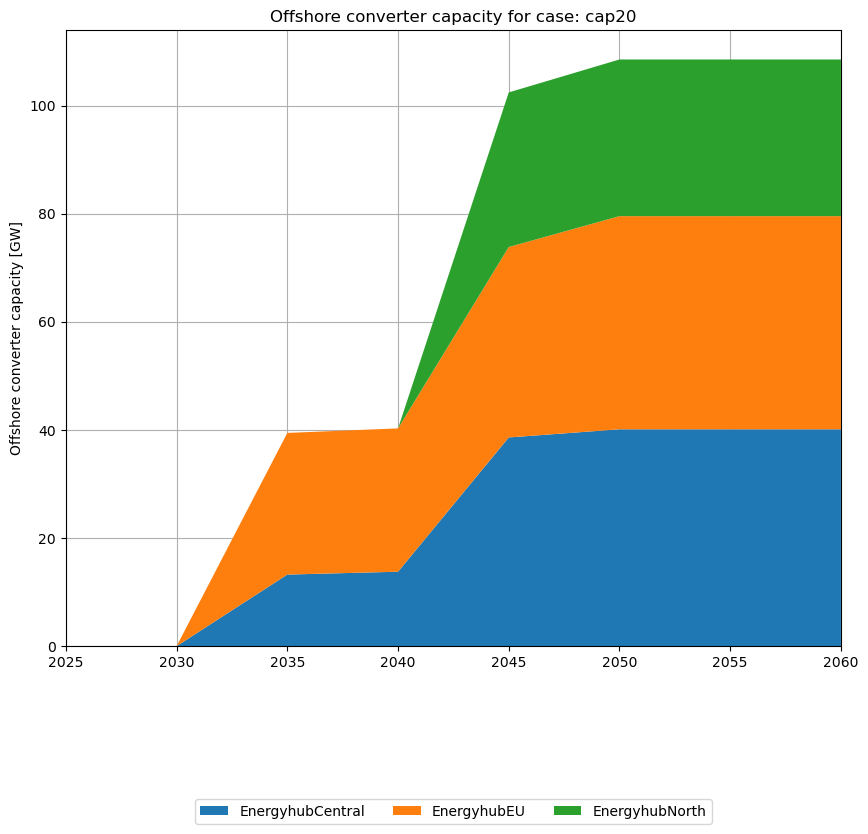

Offshore converter total capacity 2050 for case cap50: 161.24 GW



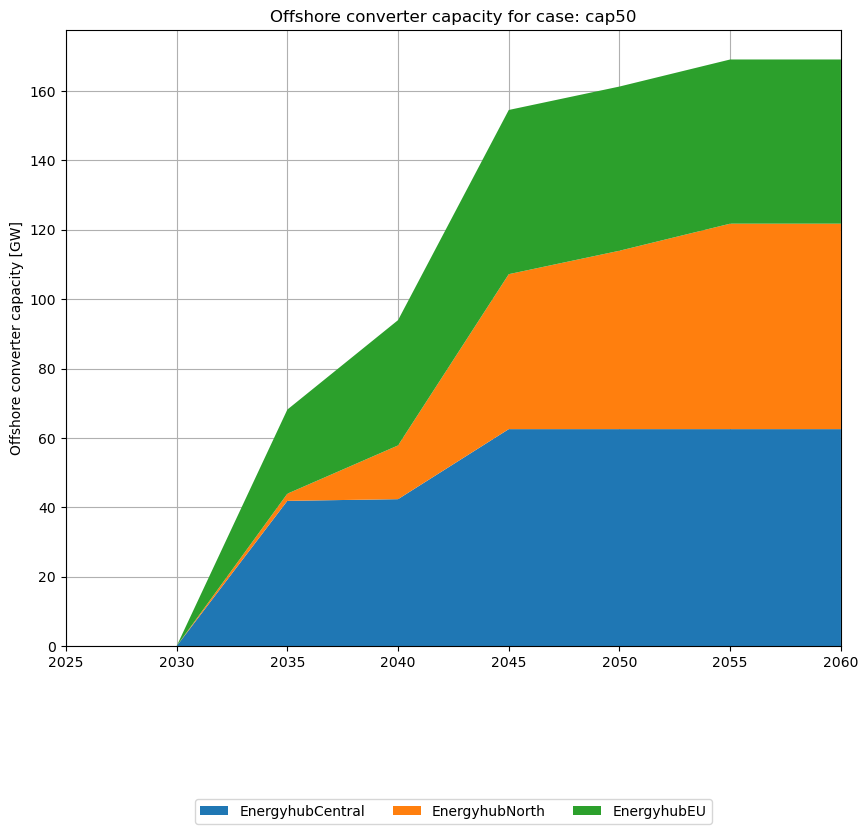

Offshore converter total capacity 2050 for case radial: 0.0 GW

Offshore converter total capacity 2050 for case radial_NO: 42.11 GW



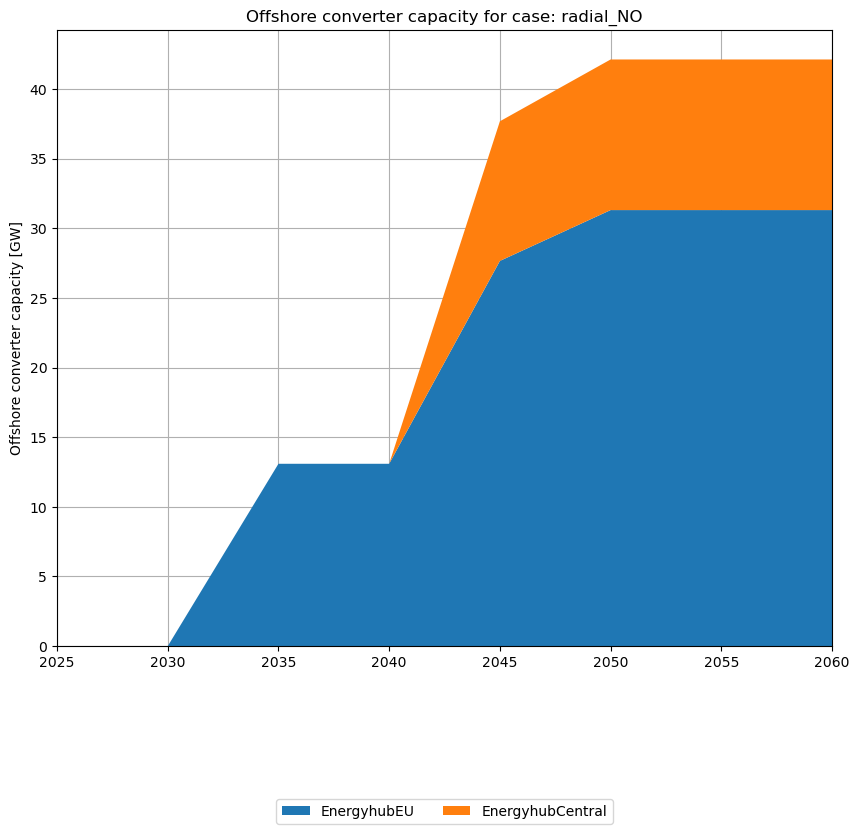

In [67]:
for case, _df in DF_BY_CASES.items():
    plot_offshore_converter_cap(case, _df)